In [2]:
import numpy as np
import sys
import time
import os
import h5py
import os.path as op
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import array
%matplotlib inline
sys.path.append('..')
from zwatershed import *
from visualization.visualize_funcs import *
from edgelist_methods import *
from run_tests import *


# -------------------------------- parameters ---------------------------------------
path_to_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/'
path_to_data = path_to_folder + 'data/'
os.chdir('/.')
global segs_old, segs_new, rand_old, rand_new
segs_old, segs_new, rand_old, rand_new = [[]], [[]], -1, -1
threshes = [10, 2000]
hdf5_gt_file = path_to_data + 'groundtruth_seg_thick.h5'  # /groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
hdf5_pred_file = path_to_data + 'groundtruth_aff.h5'#path_to_data + 'tstvol-1_2.h5'  # /tier2/turaga/singhc/train/output_200000/tstvol-1_2.h5'
seg_save_path = path_to_data + 'out/'  # '/groups/turaga/home/singhc/evaluation/out/'
seg_save_path_arb = path_to_data + 'out_arb/'  # '/groups/turaga/home/singhc/evaluation/out/'
save_threshes = threshes
p1, p2, p3 = 160, 170, 180  # 215, 214, 214 # 200, 200, 200
# ----------------------------- load/shape data ------------------------------------
hdf5_gt = h5py.File(hdf5_gt_file, 'r')
hdf5_aff = h5py.File(hdf5_pred_file, 'r')
gt = np.asarray(hdf5_gt[hdf5_gt.keys()[0]], dtype='uint32')
aff = np.asarray(hdf5_aff[hdf5_aff.keys()[0]], dtype='float32')
aff = aff[:, p1:(-1 * p1), p2:(-1 * p2), p3:(-1 * p3)]
gt = trim_arbitrary_aff(gt, aff)
nhood = -1*mknhood3d(1)
node1, node2, edge_affs = affgraph_to_edgelist(aff, nhood)

In [3]:
segs_old, rand_old, segs_new, rand_new = test_eval()
# segs_old, rand_old = test_no_eval()
print_final()


original watershed...
time:  0.787503

new watershed...
time:  3.781622 

--------Final--------
{'V_Rand_merge': [0.9952430499257651, 0.9951863471272734], 'V_Rand_split': [0.5609951168253093, 0.7557551807731029], 'V_Rand': 0.85910034766037}
{'V_Rand_merge': [0.9952425805630566, 0.9951858437107787], 'V_Rand_split': [0.5610207139667234, 0.7557551805570292], 'V_Rand': 0.859100159945081}
nsegs 19920 413
nsegs 19920 413


In [4]:
## Open training data and labels
f = h5py.File(path_to_data + 'im_uint8.h5', 'r')
im = f[f.keys()[0]] # was 'main'
g = h5py.File(path_to_data + 'groundtruth_aff.h5', 'r')
label_set = np.asarray(g[g.keys()[0]],dtype='float32') #3,z,y,x - was 'main'
label_set = np.transpose(label_set,(1,2,3,0))
aff_disp = np.transpose(aff,(1,2,3,0))

old num 19920 new num 7796


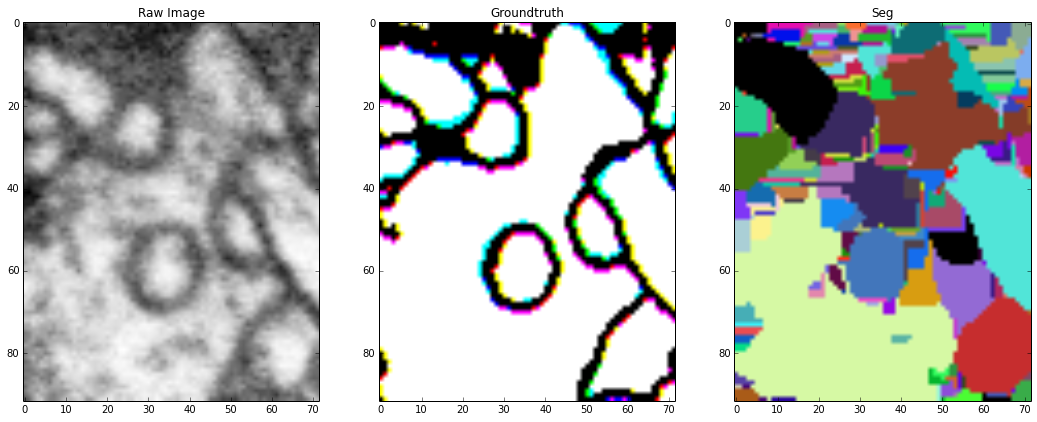

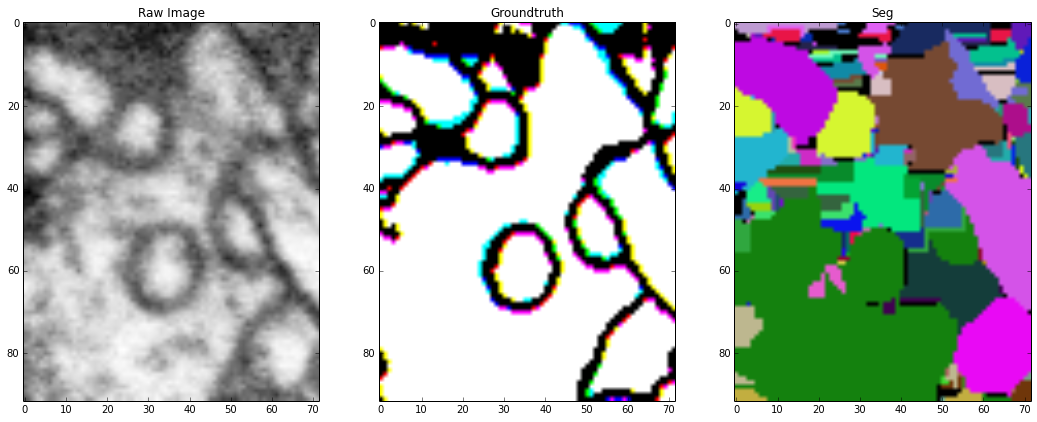

In [7]:
# view segs
num_to_view = 0
seg_old = segs_old[num_to_view]#seg_one
seg_new = segs_new[num_to_view]
im,label_set=trim_arbitrary(im,label_set,seg_new) 
_,aff_disp = trim_arbitrary(aff_disp,aff_disp,seg_new)
print "old num",len(np.unique(seg_old)),"new num",len(np.unique(seg_new))
display_arbitrary_seg(im, label_set, seg_old)
display_arbitrary_seg(im, label_set, seg_new)

24530


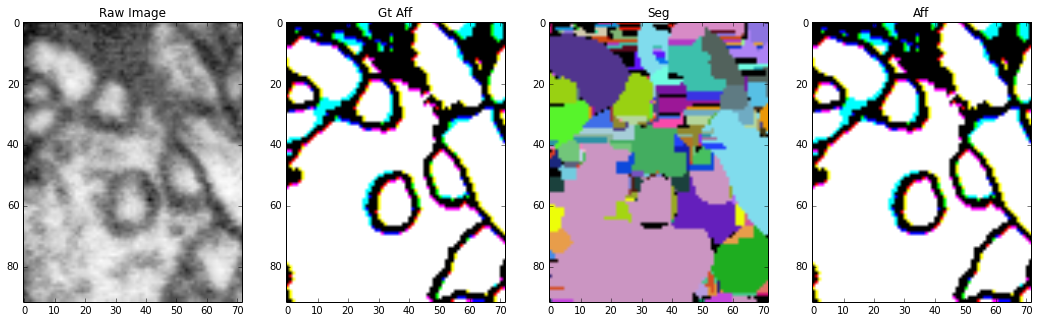

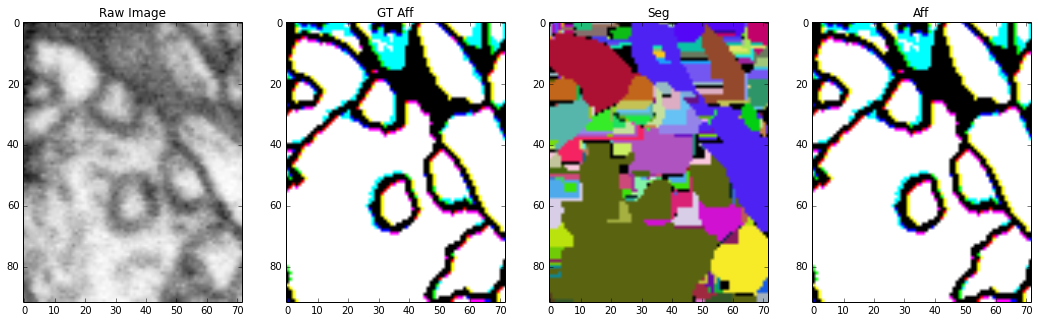

In [6]:
seg = seg_new
print np.sum(seg==0)
depth = 2
cmap = matplotlib.colors.ListedColormap(np.vstack(((0, 0, 0), np.random.rand(255, 3))))
fig = plt.figure(figsize=(20, 10))
ax1, ax2, ax3, ax4 = fig.add_subplot(1, 4, 1), fig.add_subplot(1, 4, 2), fig.add_subplot(1, 4, 3), fig.add_subplot(1, 4, 4)

fig.subplots_adjust(left=0.2, bottom=0.25)
ax1.imshow(im[depth, :, :], cmap=cm.Greys_r)
ax1.set_title('Raw Image')

ax2.imshow(label_set[depth, :, :, :])
ax2.set_title('Gt Aff')

ax3.imshow(seg[depth, :, :],cmap=cmap)
ax3.set_title('Seg')

ax4.imshow(aff_disp[depth, :, :, :])
ax4.set_title('Aff')

plt.show()

depth = 3
cmap = matplotlib.colors.ListedColormap(np.vstack(((0, 0, 0), np.random.rand(255, 3))))
fig = plt.figure(figsize=(20, 10))
ax1, ax2, ax3, ax4 = fig.add_subplot(1, 4, 1), fig.add_subplot(1, 4, 2), fig.add_subplot(1, 4, 3), fig.add_subplot(1, 4, 4)

fig.subplots_adjust(left=0.2, bottom=0.25)
ax1.imshow(im[depth, :, :], cmap=cm.Greys_r)
ax1.set_title('Raw Image')

ax2.imshow(label_set[depth, :, :, :])
ax2.set_title('GT Aff')

ax3.imshow(seg[depth, :, :],cmap=cmap)
ax3.set_title('Seg')

ax4.imshow(aff_disp[depth, :, :, :])
ax4.set_title('Aff')

plt.show()

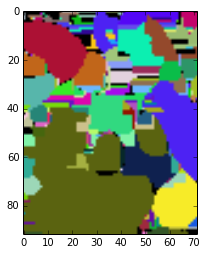

In [8]:
plt.imshow(seg[2,:, :],cmap=cmap)